# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../../data/traffic-signs-data/train.p"
validation_file= "../../data/traffic-signs-data/valid.p"
testing_file = "../../data/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.gridspec as g
import random
import pandas
import numpy as np

# Visualizations will be shown in the notebook.
%matplotlib inline

# Get an id: label_name dictionary
data_frame = pandas.read_csv("./signnames.csv")
classes_dictionary = {int(id):class_name for id, class_name in zip(data_frame['ClassId'], data_frame['SignName'])}

# Get a dictionary with class id as key and a list of samples of that class as value
def get_samples_dictionary(images, labels, n_classes, samples_per_class):
    
    samples_dictionary = {}

    for label_index in range(n_classes):

        indices = np.where(labels == label_index)[0]
        random.shuffle(indices)

        samples_dictionary[label_index] = images[indices[:samples_per_class]]
        
    return samples_dictionary

In [4]:
# Define function for plotting samples from samples dictionary
def plot_samples_dictionary(samples_dictionary, n_classes, samples_per_class):

    # Plot samples of each class
    figure, axes = plt.subplots(
        figsize=(samples_per_class, n_classes), nrows=n_classes, ncols=samples_per_class)

    # Plot samples
    for class_index, class_row in enumerate(axes):

        samples = samples_dictionary[class_index]

        for sample, sample_axes_subplot in zip(samples, class_row):

            sample_axes_subplot.imshow(sample)
            sample_axes_subplot.axis('off')

        class_row[0].set_title(classes_dictionary[class_index])

    plt.subplots_adjust(hspace=0.5)
    plt.show() 

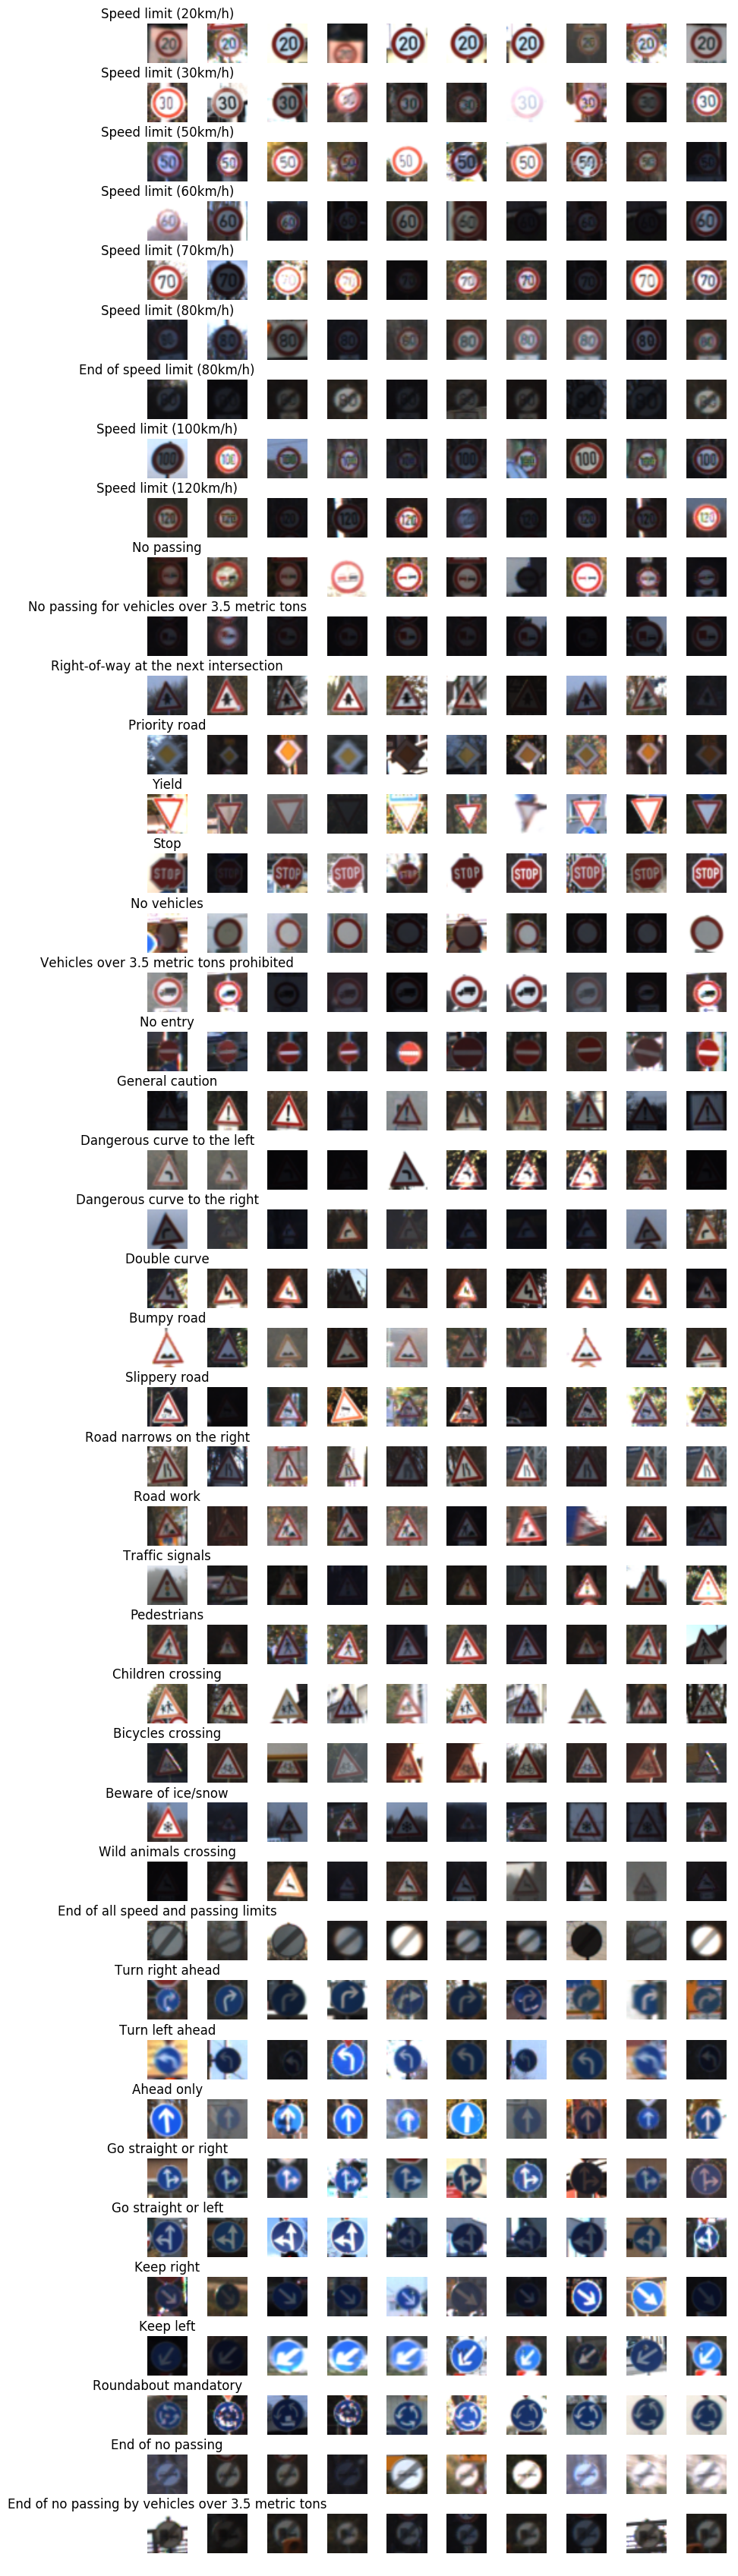

In [5]:
# Plot samples
samples_per_class = 10
samples_dictionary = get_samples_dictionary(X_train, y_train, n_classes, samples_per_class)
plot_samples_dictionary(samples_dictionary, n_classes, samples_per_class)

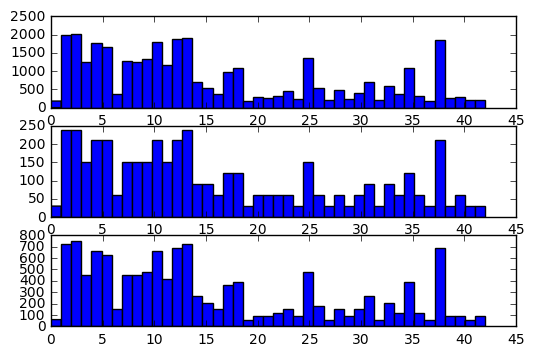

In [6]:
# Show distribution of different signs in all three data subsets
figure, (train_axes, validation_axes, test_axes) = plt.subplots(nrows=3)
train_axes.hist(y_train, bins=n_classes)
validation_axes.hist(y_valid, bins=n_classes)
test_axes.hist(y_test, bins=n_classes)
plt.show()

# Labels distribution is clearly very distorted, with some labels having only ~200 images, while other nearly 2000.
# I will later rebalance that so that each label has a similar number of samples.


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Looking at sample images we can see that a lot of them are very dark. We can try to stretch their contrast to
# make it easier to see the details. Note - I tried using OpenCV equalizeHist, but surprisingly the result was images
# brightened up so much that it often made reading signs more difficult than original images. The simple scheme
# below works well in majority of cases, though it won't achieve much when original image is mostly dark but has
# some nearly white pixels
def equalize_channel(channel):
    
    min_value = np.min(channel)
    max_value = np.max(channel)
    
    equalized_channel = (255 * (channel - min_value) / (max_value - min_value))
    return equalized_channel
    
def equalize_image(image):
    
    float_image = image.astype(np.float32)
    equalized_image = np.dstack([equalize_channel(image[:, :, channel].astype(np.float32)) for channel in range(3)])
    return equalized_image.astype(np.uint8)

X_train_equalized = np.array([equalize_image(image) for image in X_train])
X_valid_equalized = np.array([equalize_image(image) for image in X_valid])

# Finally scale our images to 0-1 range
X_train_processed = X_train_equalized.astype(np.float32) / 255
X_valid_processed = X_valid_equalized.astype(np.float32) / 255 

In [8]:
import random

def get_rebalanced_dataset(x, y):
    """
    Given dataset of training examples x and labels y, return a rebalanced dataset where each label is represented
    by an equal number of examples. New examples are simply copies of existing examples.
    """
    
    samples_dictionary = {}
    n_classes = len(set(y))
    
    # First get intial dictionary of label to examples
    for label_index in range(n_classes):

        indices = np.where(y == label_index)[0]
        samples_dictionary[label_index] = x[indices]
        
    # Get maximum count of examples for a single label
    max_examples = max([len(examples) for examples in samples_dictionary.values()])

    # For each label repeat its examples until there are total of max_examples of them
    for key in samples_dictionary.keys():
        
        examples = samples_dictionary[key].tolist()
        
        while len(examples) < max_examples:

            sampling_size = min(max_examples - len(examples), len(examples))
            random_items = random.sample(examples, sampling_size)
            examples.extend(random_items)
        
        samples_dictionary[key] = examples
        
    # And now reconstruct new dataset
    x_rebalanced = []
    y_rebalanced = []
    
    for label, samples in samples_dictionary.items():
        
        x_rebalanced.extend(samples)
        y_rebalanced.extend(len(samples) * [label])
        
    return np.array(x_rebalanced), np.array(y_rebalanced)


# Rebalance training dataset so that each label has an equal number of examples
x_train_rebalanced, y_train_rebalanced = get_rebalanced_dataset(X_train_processed, y_train)    

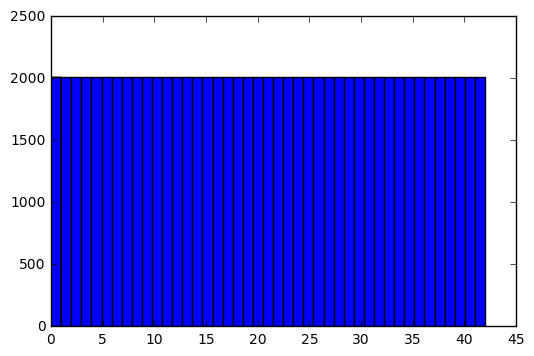

In [9]:
# Show distribution of rebalanced dataset
plt.hist(y_train_rebalanced, bins=n_classes)
plt.show()

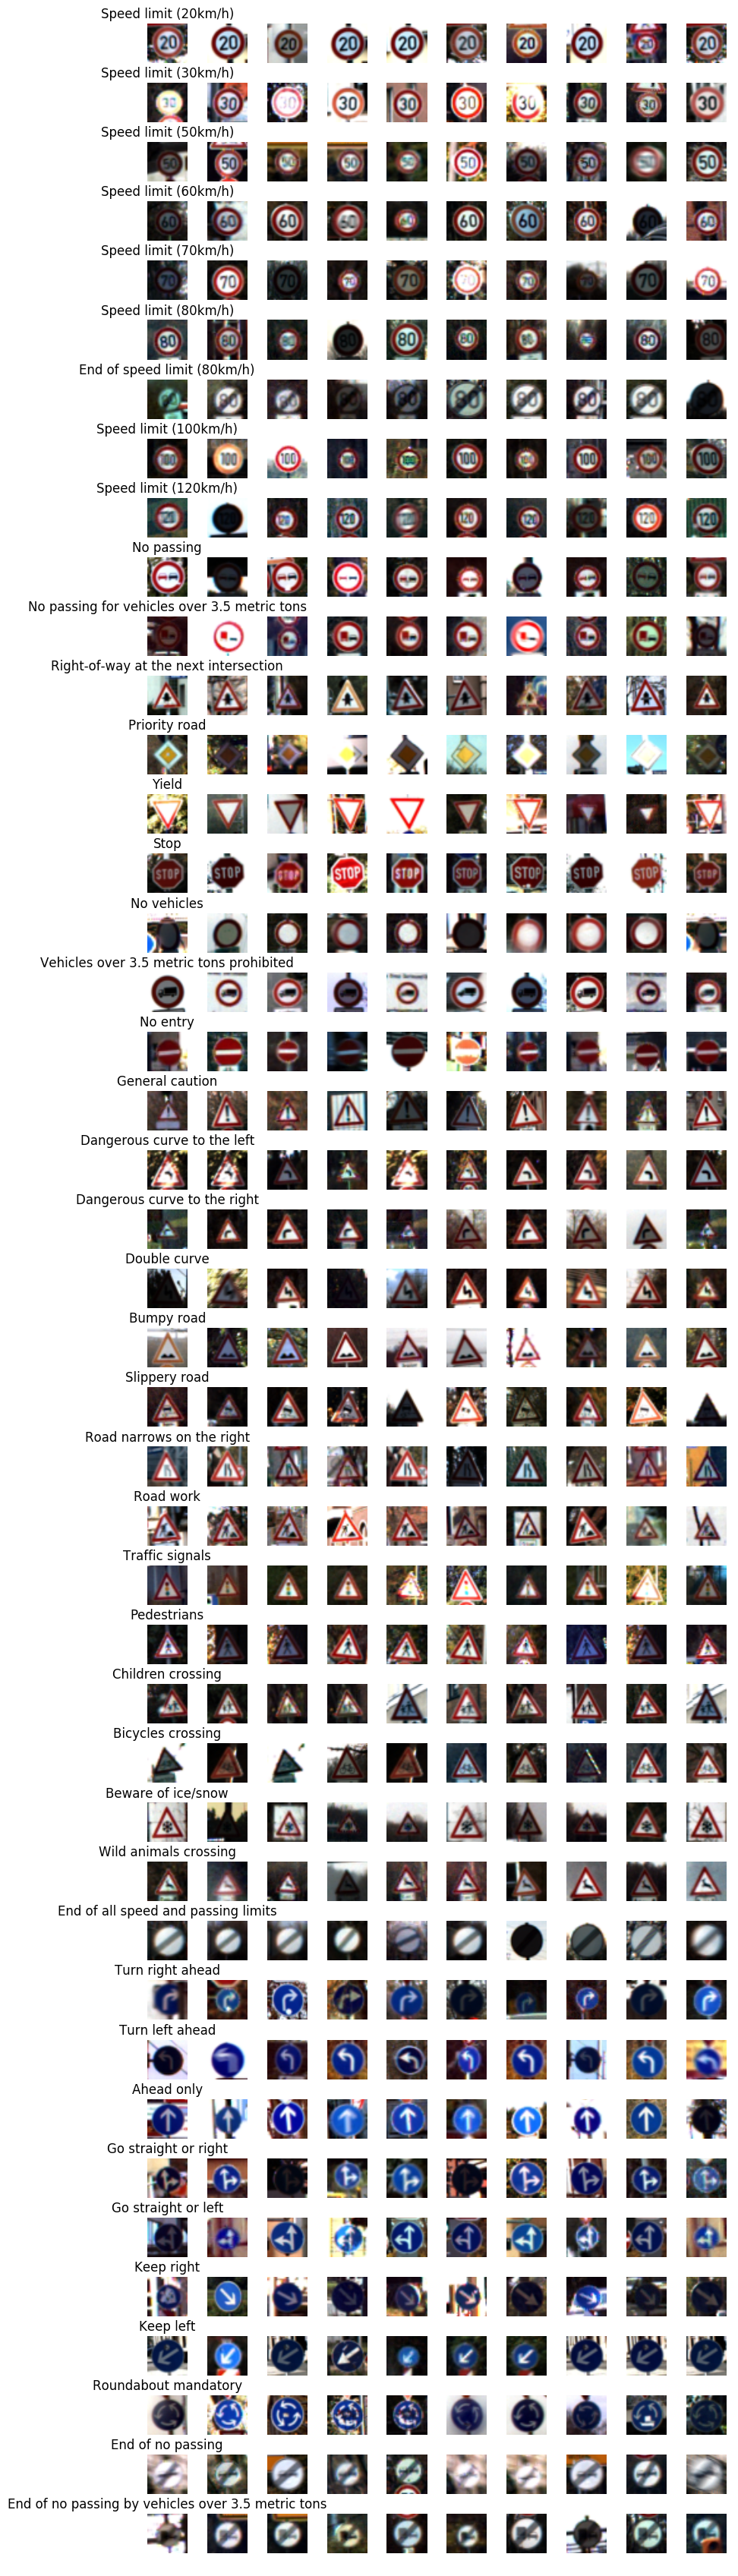

In [10]:
# Visualized processed images. We can see that a lot of dark images got brightened up, but there are still
# some dark images that weren't equalized well, since they had some small amount of white pixels initially.
# A more elaborate scheme could take care of that, but I'll stay with this simple approach for this project.
samples_dictionary = get_samples_dictionary(x_train_rebalanced, y_train_rebalanced, n_classes, samples_per_class)
plot_samples_dictionary(samples_dictionary, n_classes, samples_per_class)  

### Model Architecture

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

images_placeholder = tf.placeholder(dtype=tf.float32, shape=[None, 32, 32, 3])
labels_placeholder = tf.placeholder(dtype=tf.uint8, shape=[None])    
keep_probability_placeholder = tf.placeholder(dtype=tf.float32)
learning_rate_placeholder = tf.placeholder(dtype=tf.float32)

In [12]:
def get_model(images_placeholder, keep_probability_placeholder, n_classes):
    """
    A simple fully convolutional network
    """
    
    W = tf.Variable(tf.truncated_normal(mean=0, stddev=0.1, shape=[3, 3, 3, 32]))
    b = tf.Variable(tf.zeros(32))
    x = tf.nn.elu(tf.nn.conv2d(images_placeholder, W, strides=[1, 1, 1, 1], padding='VALID') + b)
    
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    x = tf.nn.dropout(x, keep_probability_placeholder)
            
    W = tf.Variable(tf.truncated_normal(mean=0, stddev=0.1, shape=[3, 3, 32, 32]))
    b = tf.Variable(tf.zeros(32))
    x = tf.nn.elu(tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='VALID') + b)
    
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    x = tf.nn.dropout(x, keep_probability_placeholder)
    
    W = tf.Variable(tf.truncated_normal(mean=0, stddev=0.1, shape=[6, 6, 32, n_classes]))
    b = tf.Variable(tf.zeros(n_classes))
    x = tf.nn.elu(tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='VALID') + b)
    
    return tf.squeeze(x)

logits_op = get_model(images_placeholder, keep_probability_placeholder, n_classes)

loss_op = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits_op, tf.one_hot(labels_placeholder, n_classes)))

train_op = tf.train.AdamOptimizer(learning_rate=learning_rate_placeholder).minimize(loss_op)

accuracy_op = tf.reduce_mean(
    tf.cast(tf.equal(tf.argmax(logits_op, axis=1), tf.cast(labels_placeholder, tf.int64)), tf.float32))

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

def get_statistics(session, loss_op, accuracy_op, keep_probability_placeholder, x, y, batch_size):
    """
    Simple helper to get loss and accuracy model attains on a given dataset
    """
    
    batches_count = len(y) // batch_size
    
    losses = []
    accuracies = []
    
    for batch_index in range(batches_count):

        batch_start = batch_size * batch_index
        batch_end = batch_start + batch_size

        x_batch = x[batch_start:batch_end]
        y_batch = y[batch_start:batch_end]

        feed_dictionary = {
            images_placeholder: x_batch, 
            labels_placeholder: y_batch, 
            keep_probability_placeholder: 1.0}
        
        batch_loss, batch_accuracy = session.run([loss_op, accuracy_op], feed_dict=feed_dictionary)

        losses.append(batch_loss)
        accuracies.append(batch_accuracy)

    return np.mean(losses), np.mean(accuracies)

# Don't use with clause, so we don't have to save and load model between separate cells
session = tf.Session()

In [14]:
import sklearn.utils

epochs = 10
batch_size = 128
train_batches_count = len(y_train_rebalanced) // batch_size

def get_learning_rate(epoch):
    return 0.001 if epoch < 5 else 0.0002

# Train the model
session.run(tf.global_variables_initializer())

for epoch_index in range(epochs):

    x, y = sklearn.utils.shuffle(x_train_rebalanced, y_train_rebalanced)

    for batch_index in range(train_batches_count):

        batch_start = batch_size * batch_index
        batch_end = batch_start + batch_size

        x_batch = x[batch_start:batch_end]
        y_batch = y[batch_start:batch_end]

        feed_dictionary = {
            images_placeholder: x_batch, 
            labels_placeholder: y_batch, 
            keep_probability_placeholder: 0.5,
            learning_rate_placeholder: get_learning_rate(epoch_index)}
        
        session.run(train_op, feed_dict=feed_dictionary)
            
    # Note we train on x_train_rebalanced dataset, but calculate statistics on X_train_processed,
    # which has inbalanced labels count. This is because the simple rebalancing scheme of
    # repeating existing elements we used skews statistics of that set - getting just one example right automatically
    # means getting any example that is a copy of it right, which would artificially increase accuracy
    train_loss, train_accuracy = get_statistics(
        session, loss_op, accuracy_op, keep_probability_placeholder, X_train_processed, y_train, batch_size)

    print("Epoch {}, train loss: {}, train accuracy: {}".format(epoch_index, train_loss, train_accuracy))

    valid_loss, valid_accuracy = get_statistics(
        session, loss_op, accuracy_op, keep_probability_placeholder, X_valid_processed, y_valid, batch_size)

    print("Epoch {}, validation loss: {}, validation accuracy: {}".format(epoch_index, valid_loss, valid_accuracy))

Epoch 0, train loss: 0.2542180120944977, train accuracy: 0.9370387196540833
Epoch 0, validation loss: 0.4870939254760742, validation accuracy: 0.853630542755127
Epoch 1, train loss: 0.10698220133781433, train accuracy: 0.9773985147476196
Epoch 1, validation loss: 0.3164786398410797, validation accuracy: 0.9142922759056091
Epoch 2, train loss: 0.061716366559267044, train accuracy: 0.9870848655700684
Epoch 2, validation loss: 0.23036541044712067, validation accuracy: 0.9361213445663452
Epoch 3, train loss: 0.042561788111925125, train accuracy: 0.9916397333145142
Epoch 3, validation loss: 0.21271590888500214, validation accuracy: 0.939568042755127
Epoch 4, train loss: 0.03229285776615143, train accuracy: 0.9933983087539673
Epoch 4, validation loss: 0.19522897899150848, validation accuracy: 0.9482996463775635
Epoch 5, train loss: 0.027626020833849907, train accuracy: 0.9944649338722229
Epoch 5, validation loss: 0.1837625950574875, validation accuracy: 0.9508271813392639
Epoch 6, train loss

In [15]:
# Test model

# Preprocessing
X_test_processed = np.array([equalize_image(image) for image in X_test]).astype(np.float32) / 255

test_loss, test_accuracy = get_statistics(
session, loss_op, accuracy_op, keep_probability_placeholder, X_test_processed, y_test, batch_size)

print("Test loss: {}, test accuracy: {}".format(test_loss, test_accuracy))

Test loss: 0.23304098844528198, test accuracy: 0.9449936151504517


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

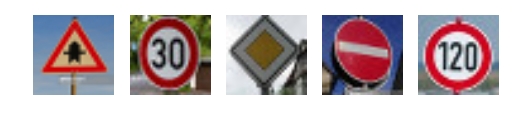

In [16]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image

images = [matplotlib.image.imread(
        os.path.join("../../data/traffic-signs-data/additional", "sign_{}_crop.jpg".format(index)))
        for index in range(1, 6)]

for index, image in enumerate(images):

    plt.subplot(1, 5, index + 1)
    plt.imshow(image)
    plt.axis('off')

plt.show()

### Predict the Sign Type for Each Image

In [17]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

processed_images = np.array([equalize_image(image) for image in images]).astype(np.float32) / 255

feed_dictionary = {
    images_placeholder: np.array(images),  
    keep_probability_placeholder: 1
}

prediction_logits = session.run(logits_op, feed_dict=feed_dictionary)
print(prediction_logits)

[[  8.45199097e+02  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00
    3.00573456e+02  -1.00000000e+00  -1.00000000e+00   4.52479584e+02
    4.72079735e+01  -1.00000000e+00   6.29705505e+02   9.28818359e+02
   -1.00000000e+00  -1.00000000e+00   9.28703613e+02  -1.00000000e+00
    1.24265869e+03   1.66824121e+03   4.23644318e+02  -1.00000000e+00
    1.30816541e+03   1.32903760e+03  -1.00000000e+00   2.04811127e+02
   -1.00000000e+00  -1.00000000e+00  -1.00000000e+00   5.70866943e+02
   -1.00000000e+00  -1.00000000e+00   1.09048914e+03  -1.00000000e+00
   -1.00000000e+00  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00
   -1.00000000e+00  -1.00000000e+00  -1.00000000e+00  -1.00000000e+00
   -1.00000000e+00  -1.00000000e+00  -1.00000000e+00]
 [  8.95924316e+02   1.73988086e+03   6.91911377e+02   1.39167810e+03
   -1.00000000e+00   5.72925903e+02   2.33266403e+02  -1.00000000e+00
    5.27119751e+02  -1.00000000e+00   6.49956465e+00   3.56783905e+02
   -1.00000000e+00  -1.00000000e+00 

### Analyze Performance

In [18]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
labels = [11, 1, 12, 17, 8]

feed_dictionary = {
    images_placeholder: np.array(images),  
    labels_placeholder: np.array(labels),
    keep_probability_placeholder: 1
}

accuracy = session.run(accuracy_op, feed_dict=feed_dictionary)
print(accuracy)

0.8


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [19]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

feed_dictionary = {
    images_placeholder: np.array(images),  
    keep_probability_placeholder: 1
}

# Use softmax rather than logits, so we can output percentages
softmax_output_op = tf.nn.softmax(logits_op)

top_predictions = session.run(tf.nn.top_k(softmax_output_op, k=5), feed_dict=feed_dictionary)

for index, (image, label) in enumerate(zip(images, labels)):
    
    predictions = top_predictions.values[index]
    predictions_indices = top_predictions.indices[index]
    
    print("For {}:".format(classes_dictionary[label]))
    
    for prediction, prediction_index in zip(predictions, predictions_indices):
        
        print("\t{}: {}%".format(classes_dictionary[prediction_index], 100 * prediction))

For Right-of-way at the next intersection:
	No entry: 100.0%
	Speed limit (20km/h): 0.0%
	Speed limit (30km/h): 0.0%
	Speed limit (50km/h): 0.0%
	Speed limit (60km/h): 0.0%
For Speed limit (30km/h):
	Speed limit (30km/h): 100.0%
	Speed limit (20km/h): 0.0%
	Speed limit (50km/h): 0.0%
	Speed limit (60km/h): 0.0%
	Speed limit (70km/h): 0.0%
For Priority road:
	Priority road: 100.0%
	Speed limit (20km/h): 0.0%
	Speed limit (30km/h): 0.0%
	Speed limit (50km/h): 0.0%
	Speed limit (60km/h): 0.0%
For No entry:
	No entry: 100.0%
	Speed limit (20km/h): 0.0%
	Speed limit (30km/h): 0.0%
	Speed limit (50km/h): 0.0%
	Speed limit (60km/h): 0.0%
For Speed limit (120km/h):
	Speed limit (120km/h): 100.0%
	Speed limit (20km/h): 0.0%
	Speed limit (30km/h): 0.0%
	Speed limit (50km/h): 0.0%
	Speed limit (60km/h): 0.0%


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 